In [ ]:
# -*- coding: utf-8 -*-
# check image and label
import mxnet as mx
import os
import numpy as np
import matplotlib.pyplot as plt

record_path = '../rec/align_train.rec'
record = mx.recordio.MXIndexedRecordIO(os.path.splitext(record_path)[0] + '.idx',
                                           record_path, 'r')
indices = record.keys
for i in range(10, 20):
    idx = indices[i]
    item = record.read_idx(idx)
    header, img = mx.recordio.unpack_img(item)
    label = header.label
    label = np.array(label, dtype=np.int)
    plt.figure()
    plt.title(str(label))
    plt.imshow(img)
    plt.show()

In [12]:
# -*- coding: utf-8 -*-
# check new label
import mxnet as mx
import os
import numpy as np
import matplotlib.pyplot as plt

record_path = '../rec/align_train_1_newlabel.rec'
record = mx.recordio.MXIndexedRecordIO(os.path.splitext(record_path)[0] + '.idx',
                                           record_path, 'r')
indices = record.keys
for i in range(100):
    idx = indices[i]
    item = record.read_idx(idx)
    header, img = mx.recordio.unpack_img(item)
    label = header.label
    label = np.array(label, dtype=np.int)
    print(label, end=' ')

0 0 1 1 1 0 2 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 2 1 0 0 0 0 0 0 0 2 0 1 1 0 2 0 1 1 1 2 0 0 1 0 0 1 2 0 0 1 1 0 0 0 1 2 1 1 2 1 0 1 2 0 1 2 1 0 1 2 0 0 1 0 0 1 0 0 0 2 0 1 1 2 2 0 0 1 0 2 1 0 1 0 2 

In [6]:
# -*- coding: utf-8 -*-
# 将train set 128d特征降维保存
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

f = np.load('../npy_version2/train/features.npy')
f = np.squeeze(f, axis=1)
f_embed = TSNE().fit_transform(f)
np.save('../npy_version2/train/f_embedding.npy', f_embed)
print('embedding over...')

embedding over...


(12484, 2)


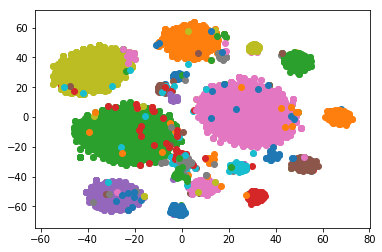

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 读取降维特征，画图
f_embed = np.load('../npy_version2/train/f_embedding.npy')
print(f_embed.shape)

label = pd.read_csv('../npy_version2/train/label_no999.csv')
label = np.array(label)

classes = pd.read_csv('../tongji_version2/new_train_classes.csv')
classes = np.array(classes)
# colors = ['r','g','b','black','purple','pink', 'gray', 'yellow', 'brown']
for i in range(len(classes)):
    data = []
    for j in range(len(label)):
        if (label[j] == classes[i]).all():
            data.append(f_embed[j])

    data = np.array(data)
#     print(data.shape)
    plt.scatter(data[:,0],data[:,1])   
#     plt.legend(str(i))
plt.show()

In [19]:
# -*- coding: utf-8 -*-
# 将train set 128d特征降维保存
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

f = np.load('../npy_version4/train/features.npy')
f = np.squeeze(f, axis=1)
f_embed = TSNE().fit_transform(f)
np.save('../npy_version4/train/f_embedding.npy', f_embed)
print('embedding over...')

embedding over...


(10001, 2)
(32, 12)


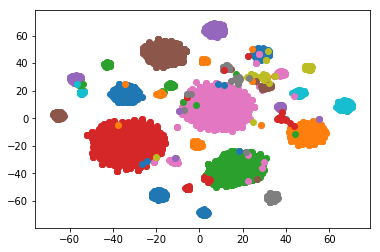

In [23]:
# 读取降维特征，画图
f_embed = np.load('../npy_version4/train1/f_embedding.npy')
print(f_embed.shape)

label = pd.read_csv('../npy_version4/train1/label.csv')
label = np.array(label)

classes = pd.read_csv('../tongji_version4/train_classes_above50.csv')
classes = np.array(classes)
print(classes.shape)
# colors = ['r','g','b','black','purple','pink', 'gray', 'yellow', 'brown']
for i in range(len(classes)):
    data = []
    for j in range(len(label)):
        if (label[j] == i).all():
            data.append(f_embed[j])

    data = np.array(data)
#     print(data.shape)
    plt.scatter(data[:,0],data[:,1])   
#     plt.legend(str(i))
plt.show()

In [17]:
# -*- coding: utf-8 -*-
# 将target 128d特征降维保存
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

f = np.load('../npy_version4/test1/features.npy')
f = np.squeeze(f, axis=1)
f_embed = TSNE().fit_transform(f)
np.save('../npy_version4/test1/f_embedding.npy', f_embed)
print('embedding over...')

embedding over...


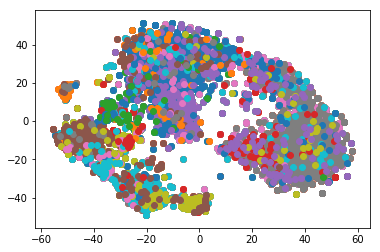

In [26]:
f_embed = np.load('../npy_version4/test1/f_embedding.npy')

label = pd.read_csv('../npy_version4/test1/label.csv')
label = np.array(label)

classes = pd.read_csv('../tongji_version4/train_classes_above50.csv')
classes = np.array(classes)
# 将feature按类画图
for i in range(len(classes)):
    data = []
    for j in range(len(label)):
        if (label[j] == i).all():
            data.append(f_embed[j])
    
    data = np.array(data)
    plt.scatter(data[:,0],data[:,1])   
plt.show()

In [16]:
# -*- coding: utf-8 -*-
# 将distractor 128d特征降维
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

f = np.load('../new_npy_m0.5/distractor/features.npy')
f = np.squeeze(f, axis=1)
f_embed = TSNE().fit_transform(f)
np.save('../new_npy_m0.5/distractor/f_embedding.npy', f_embed)

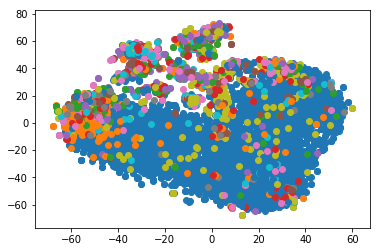

In [17]:
f_embed = np.load('../new_npy_m0.5/distractor/f_embedding.npy')

label = pd.read_csv('../new_npy_m0.5/distractor/label_no999.csv')
label = np.array(label)

d1 = pd.read_csv('../tongji/classes_count1.csv')
d2 = pd.read_csv('../tongji/classes_count2.csv')
dd = np.vstack((d1, d2))
d3 = pd.read_csv('../tongji/new_distractor2+_classes.csv')
distractor_class = np.vstack((dd, d3))
classes = distractor_class
b = np.zeros(12)
classes = np.insert(distractor_class, 0, values=b, axis=0)

# 将feature按类存储
for i in range(len(classes)):
    data = []
    for j in range(len(label)):
        if (label[j] == classes[i]).all():
            data.append(f_embed[j])

    data = np.array(data)
    plt.scatter(data[:,0],data[:,1])   
plt.show()

In [5]:
# get newlabel csv
import os
import argparse
import mxnet as mx
from mxnet import gluon, autograd, nd
from mxnet.gluon.data.vision import transforms as T
from tqdm import tqdm
from prettytable import PrettyTable
from metric import Accuracy, F1
from train_with_eval import Transpose, TransposeChannels
from network import DRML, PretrainedModel, VGGFace
import numpy as np
from sklearn.preprocessing import normalize
import pandas as pd


transform = T.Compose([T.Resize(112), Transpose()])

record_path = '../rec/align_train_1_newlabel.rec'

record = mx.recordio.MXIndexedRecordIO(os.path.splitext(record_path)[0] + '.idx',
                                       record_path, 'r')

indices = record.keys

num_items_0 = 0
labels = []
for i in range(len(indices)):
    idx = indices[i]
    item = record.read_idx(idx)
    header, img = mx.recordio.unpack_img(item)
    label = header.label
    label = np.array(label, dtype=np.int32)
    labels.append(label)
    print('\rWriting {} items.. '.format(i), end='')
print(np.shape(labels))
labels = pd.DataFrame(labels)
labels.to_csv('../npy/train_1_newlabel.csv', index=False)
record.close()
print('Done.')


Writing 4840 items.. (4841,)
Done.
